In [1]:
%pylab inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [2]:
danq_result = "/storage/pandaman/project/Alzheimers/binary-extended/results/%s/lable-logit.txt"
resnet_result = "/storage/pandaman/project/Alzheimers_ResNet/storage/experiments/results_extended/%s/category_0/labels_logits.txt"
coordconv_result = "/storage/pandaman/project/Alzheimers_ResNet/storage/experiments/results_extended_coordconv_sliding/%s/category_0/labels_logits.txt"

TF_names = ["LHX2", "NeuN", "Olig2", "PU1"]

In [3]:
def compute_fpr_tpr(filename):
    labels = []
    logits = []
    for line in open(filename):
        lbl, lgt = line.strip().split()
        labels.append(float(lbl))
        logits.append(float(lgt))
        
    fpr, tpr, thresholds = roc_curve(labels, logits)
    roc_value = roc_auc_score(labels, logits)
    return fpr, tpr, thresholds, roc_value

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


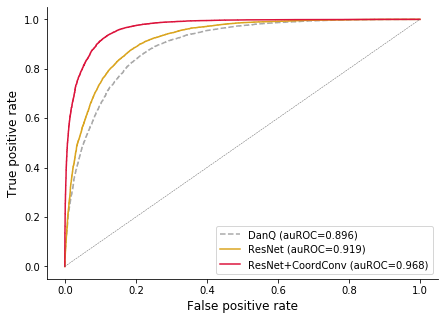

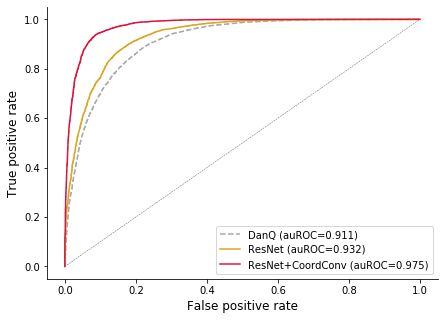

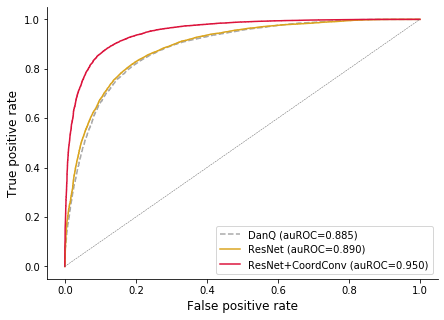

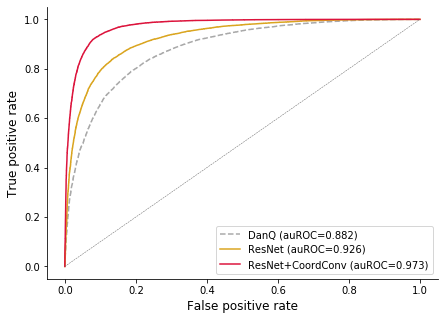

In [4]:
for TF_name in TF_names:
    fpr_danq, tpr_danq, thresholds_danq, roc_value_danq = compute_fpr_tpr(danq_result %TF_name)
    fpr_resnet, tpr_resnet, thresholds_resnet, roc_value_resnet = compute_fpr_tpr(resnet_result %TF_name)
    fpr_coordconv, tpr_coordconv, thresholds_coordconv, roc_value_coordconv = compute_fpr_tpr(coordconv_result %TF_name)
    
    fig = plt.figure()
    fig.set_size_inches((7, 5))
    ax = fig.add_subplot(111)
    ax.plot(fpr_danq, tpr_danq, color="darkgrey", linestyle="dashed", label="DanQ (auROC=%.3f)" %roc_value_danq);
    ax.plot(fpr_resnet, tpr_resnet, color="goldenrod", label="ResNet (auROC=%.3f)" %roc_value_resnet);
    ax.plot(fpr_coordconv, tpr_coordconv, color="crimson", label="ResNet+CoordConv (auROC=%.3f)" %roc_value_coordconv);
    ax.plot([0,1],[0,1], color="dimgrey", linestyle="dashed", linewidth=0.5)
    ax.legend(loc="lower right")

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel("False positive rate", size=12, fontname="Arial");
    ax.set_ylabel("True positive rate", size=12, fontname="Arial");

    #fig.savefig("auROC_curve_%s.pdf"%TF_name)